In [106]:
import pandas as pd
pd.options.display.float_format = '{:.3f}'.format
import random
import numpy as np
import matplotlib.pyplot as plt

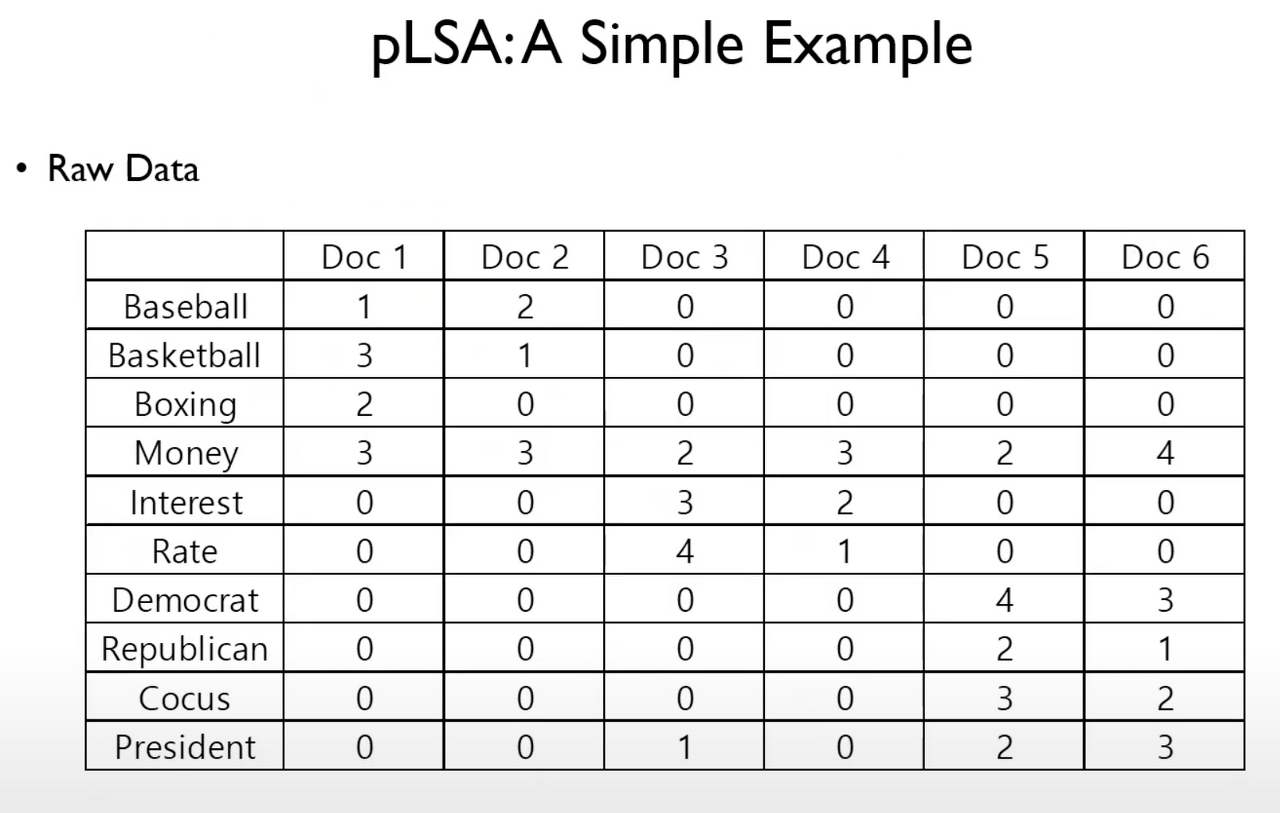

# 코퍼스 생성하기

In [107]:
corpus = pd.DataFrame([[1, 2, 0, 0, 0, 0],
                      [3, 1, 0, 0, 0, 0],
                      [2, 0, 0, 0, 0, 0],
                      [3, 3, 2, 3, 2, 4],
                      [0, 0, 3, 2, 0, 0],
                      [0, 0, 4, 1, 0, 0],
                      [0, 0, 0, 0, 4, 3],
                      [0, 0, 0, 0, 2, 1],
                      [0, 0, 0, 0, 3, 2],
                      [0, 0, 1, 0, 2, 3]],
                      columns = ['Doc1', 'Doc2', 'Doc3', 'Doc4', 'Doc5', 'Doc6'],
                      index = ['Baseball', 'Basketball', 'Boxing', 'Money', 
                               'Interest', 'Rate', 'Democrat', 'Republican',
                               'Cocus', 'President'])

In [108]:
corpus

,Doc1,Doc2,Doc3,Doc4,Doc5,Doc6
Baseball,1,2,0,0,0,0
Basketball,3,1,0,0,0,0
Boxing,2,0,0,0,0,0
Money,3,3,2,3,2,4
Interest,0,0,3,2,0,0
Rate,0,0,4,1,0,0
Democrat,0,0,0,0,4,3
Republican,0,0,0,0,2,1
Cocus,0,0,0,0,3,2
President,0,0,1,0,2,3


# 파라미터 초기화

In [109]:
ntopics = 3
ndocs = len(corpus.columns)
nterms = len(corpus.index)
print('토픽의 수:', ntopics, '\n문서의 수:', ndocs, '\n단어의 수:', nterms)

토픽의 수: 3 
문서의 수: 6 
단어의 수: 10


In [110]:
p_zdw_index = []

for i in corpus.columns:
  for j in corpus.index:
    p_zdw_index.append(i + ' ' + j)

In [111]:
p_zdw_index

['Doc1 Baseball',
 'Doc1 Basketball',
 'Doc1 Boxing',
 'Doc1 Money',
 'Doc1 Interest',
 'Doc1 Rate',
 'Doc1 Democrat',
 'Doc1 Republican',
 'Doc1 Cocus',
 'Doc1 President',
 'Doc2 Baseball',
 'Doc2 Basketball',
 'Doc2 Boxing',
 'Doc2 Money',
 'Doc2 Interest',
 'Doc2 Rate',
 'Doc2 Democrat',
 'Doc2 Republican',
 'Doc2 Cocus',
 'Doc2 President',
 'Doc3 Baseball',
 'Doc3 Basketball',
 'Doc3 Boxing',
 'Doc3 Money',
 'Doc3 Interest',
 'Doc3 Rate',
 'Doc3 Democrat',
 'Doc3 Republican',
 'Doc3 Cocus',
 'Doc3 President',
 'Doc4 Baseball',
 'Doc4 Basketball',
 'Doc4 Boxing',
 'Doc4 Money',
 'Doc4 Interest',
 'Doc4 Rate',
 'Doc4 Democrat',
 'Doc4 Republican',
 'Doc4 Cocus',
 'Doc4 President',
 'Doc5 Baseball',
 'Doc5 Basketball',
 'Doc5 Boxing',
 'Doc5 Money',
 'Doc5 Interest',
 'Doc5 Rate',
 'Doc5 Democrat',
 'Doc5 Republican',
 'Doc5 Cocus',
 'Doc5 President',
 'Doc6 Baseball',
 'Doc6 Basketball',
 'Doc6 Boxing',
 'Doc6 Money',
 'Doc6 Interest',
 'Doc6 Rate',
 'Doc6 Democrat',
 'Doc6 Republica

In [112]:
p_z = pd.DataFrame(np.random.uniform(size = (1, ntopics)), 
                                     columns = ['Topic1', 'Topic2', 'Topic3'],
                                     index = ['P(z)'])
p_dz = pd.DataFrame(np.random.uniform(size = (ndocs, ntopics)),
                                      columns = p_z.columns, 
                                      index = corpus.columns)
p_wz = pd.DataFrame(np.random.uniform(size = (nterms, ntopics)),
                                      columns = p_z.columns,
                                      index = corpus.index)
p_zdw = pd.DataFrame(np.random.uniform(size = (nterms * ndocs, ntopics)),
                                      columns = p_z.columns,
                                      index = p_zdw_index)

In [113]:
print("P(z):")
p_z

P(z):


,Topic1,Topic2,Topic3
P(z),0.682,0.173,0.070


In [114]:
print("P(d|z):")
p_dz

P(d|z):


,Topic1,Topic2,Topic3
Doc1,0.923,0.844,0.357
Doc2,0.950,0.554,0.231
Doc3,0.158,0.921,0.038
Doc4,0.880,0.100,0.445
Doc5,0.092,0.211,0.525
Doc6,0.202,0.055,0.677


In [115]:
print("P(w|z):")
p_wz

P(w|z):


,Topic1,Topic2,Topic3
Baseball,0.912,0.272,0.086
Basketball,0.257,0.836,0.566
Boxing,0.017,0.243,0.349
Money,0.793,0.126,0.113
Interest,0.038,0.640,0.289
Rate,0.555,0.105,0.112
Democrat,0.815,0.553,0.274
Republican,0.656,0.692,0.395
Cocus,0.840,0.929,0.365
President,0.783,0.319,0.816


In [116]:
print("P(z|d, w):")
p_zdw

P(z|d, w):


,Topic1,Topic2,Topic3
Doc1 Baseball,0.610,0.137,0.107
Doc1 Basketball,0.858,0.684,0.754
Doc1 Boxing,0.306,0.567,0.599
Doc1 Money,0.076,0.914,0.271
Doc1 Interest,0.106,0.044,0.178
Doc1 Rate,0.911,0.213,0.126
Doc1 Democrat,0.142,0.534,0.674
Doc1 Republican,0.499,0.182,0.543
Doc1 Cocus,0.701,0.030,0.736
Doc1 President,0.958,0.422,0.960


# EM-알고리즘

## Expectation Step

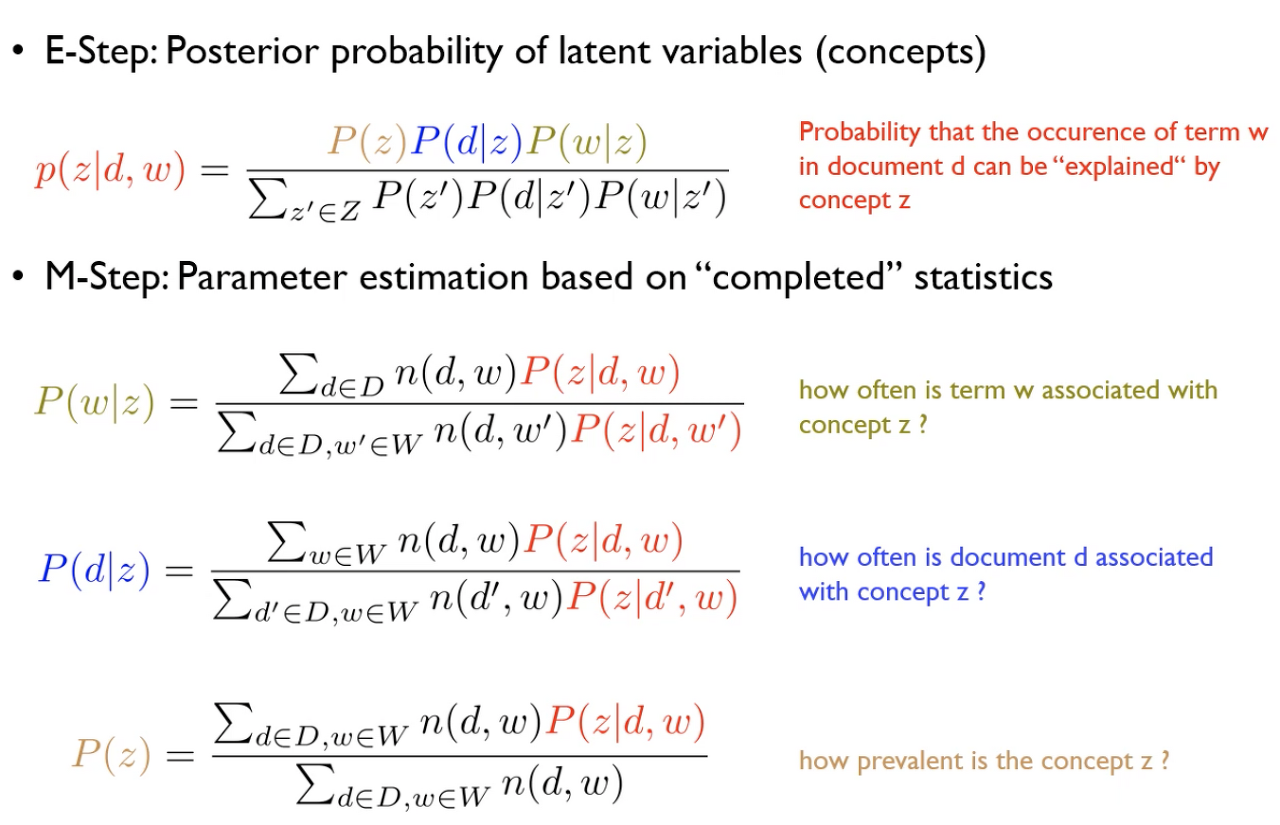

In [117]:
def e_step(p_z, p_dz, p_wz):

  for i in range(len(corpus.index) * len(corpus.columns)):
    doc = p_zdw_index[i].split(' ')[0]
    term = p_zdw_index[i].split(' ')[1]
    denominator = (p_z * p_dz.loc[doc] * p_wz.loc[term]).sum(axis = 1)
    for j in range(ntopics):
      topic = p_z.columns[j]
      numerator = p_z[topic] * p_dz.loc[doc, topic] * p_wz.loc[term, topic]
      p_zdw.iloc[i, j] = numerator / denominator

  return(p_zdw)

## Maximization Step

In [118]:
def m_step(p_z, p_dz, p_wz):

  for i in range(len(p_wz.index)):
    term = p_wz.index[i]
    byterm = []
    for j in range(len(p_zdw.index)):
      byterm.append(term in p_zdw.index[j])
    for k in range(len(p_wz.columns)):
      topic = p_wz.columns[k]
      p_wz_numerator = sum(corpus.loc[term].values * (p_zdw.loc[byterm, topic]).values)
      p_wz_denominator = sum(np.reshape(corpus.values, 60) * p_zdw[topic].values)
      p_wz.loc[term, topic] = p_wz_numerator / p_wz_denominator

  for i in range(len(p_dz.index)):
    doc = p_dz.index[i]
    bydoc = []
    for j in range(len(p_zdw.index)):
      bydoc.append(doc in p_zdw.index[j])
    for k in range(len(p_dz.columns)):
      topic = p_dz.columns[k]
      p_dz_numerator = sum(corpus[doc].values * (p_zdw.loc[bydoc, topic]).values)
      p_dz_denominator = sum(np.reshape(corpus.values, 60) * p_zdw[topic].values)
      p_dz.loc[doc, topic] = p_dz_numerator / p_dz_denominator

  for i in range(len(p_z.columns)):
    topic = p_z.columns[i]
    p_z_numerator = sum(np.reshape(corpus.values, 60) * p_zdw[topic].values)
    p_z_denominator = sum(sum(corpus.values))
    p_z[topic] = p_z_numerator / p_z_denominator

  return(p_z, p_dz, p_wz)

# 결과

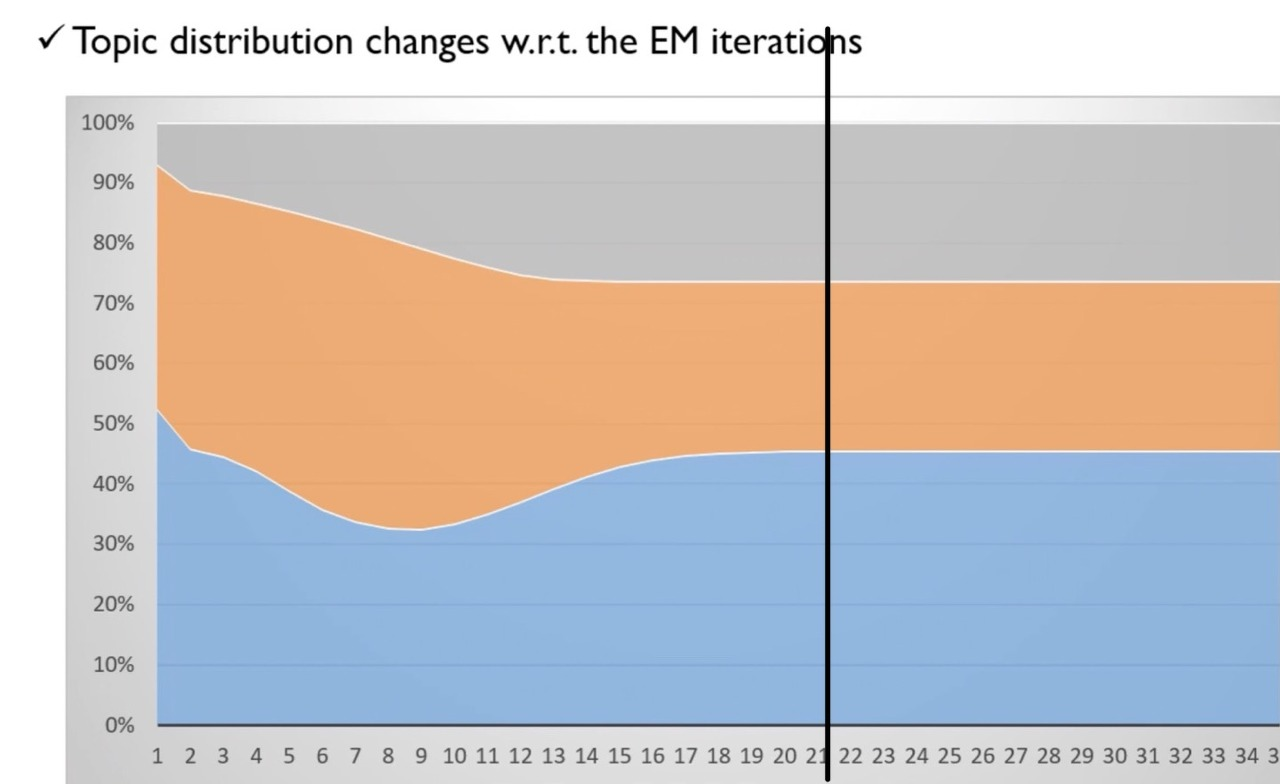

In [119]:
i = 0
pz_df = p_z

while i < 30:
  p_zdw = e_step(p_z, p_dz, p_wz)
  p_z, p_dz, p_wz = m_step(p_z, p_dz, p_wz)
  pz_df = pz_df.append(pd.Series(np.reshape(p_z.values, 3), index = pz_df.columns), 
                     ignore_index = True)
  i = i + 1

In [120]:
pz_df

,Topic1,Topic2,Topic3
0,0.596,0.273,0.130
1,0.596,0.273,0.130
2,0.731,0.206,0.063
3,0.743,0.192,0.065
4,0.716,0.189,0.096
5,0.678,0.186,0.136
6,0.636,0.197,0.167
7,0.550,0.219,0.231
8,0.486,0.248,0.266
9,0.447,0.277,0.276


In [121]:
p_wz

,Topic1,Topic2,Topic3
Baseball,0.191,0.000,0.000
Basketball,0.255,0.000,0.000
Boxing,0.106,0.018,0.000
Money,0.348,0.302,0.261
Interest,0.000,0.273,0.000
Rate,0.000,0.273,0.000
Democrat,0.000,0.000,0.304
Republican,0.000,0.000,0.130
Cocus,0.000,0.000,0.217
President,0.000,0.055,0.217


Topic1: 스포츠\
\
Topic2: 경제\
\
Topic3: 정치

In [122]:
p_dz

,Topic1,Topic2,Topic3
Doc1,0.518,0.048,0.000
Doc2,0.383,0.000,0.000
Doc3,0.000,0.546,0.000
Doc4,0.000,0.327,0.000
Doc5,0.000,0.000,0.565
Doc6,0.000,0.000,0.565


In [123]:
p_z

,Topic1,Topic2,Topic3
P(z),0.275,0.321,0.404
